**FAKE AND REAL NEWS PREDICTION**


In [3]:
#loading modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from flask import Flask, request, render_template



In [4]:
#downloading nltk data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
#Loading Datasets
true=pd.read_csv('True.csv')
fake=pd.read_csv('Fake.csv')

In [6]:
print("True Data Set")
true.head()

True Data Set


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
print("Fake Data Set")
fake.head()

Fake Data Set


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
true['label']=1
fake['label']=0

In [9]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [10]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [11]:
#concatenate
df=pd.concat([true,fake],axis=0)
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [17]:
df.tail()

,title,text,subject,date,label
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [13]:
print("Duplicate values are :")
df.isnull().sum()

Duplicate values are :


,0
title,0
text,0
subject,0
date,0
label,0


In [15]:
df.dtypes

,0
title,object
text,object
subject,object
date,object
label,int64


In [16]:
df.shape

(44898, 5)

In [18]:
df=df.drop(['title','subject','date'],axis=1)
df.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [19]:
df=df.sample(frac=1)
df.head()

,text,label
2831,Former Secretary of State Madeleine Albright h...,0
3927,Appearing at a concert for Hillary Clinton in ...,0
17283,Why do we even need a Congress anymore? We hav...,0
2263,"BRIDGEWATER, N.J. (Reuters) - President Donald...",1
4240,Conservative radio show host Alex Jones recent...,0


In [21]:
df.reset_index(inplace=True)
df.head()

,index,text,label
0,2831,Former Secretary of State Madeleine Albright h...,0
1,3927,Appearing at a concert for Hillary Clinton in ...,0
2,17283,Why do we even need a Congress anymore? We hav...,0
3,2263,"BRIDGEWATER, N.J. (Reuters) - President Donald...",1
4,4240,Conservative radio show host Alex Jones recent...,0


In [22]:
df.drop(['index'],axis=1,inplace=True)
df.head()

,text,label
0,Former Secretary of State Madeleine Albright h...,0
1,Appearing at a concert for Hillary Clinton in ...,0
2,Why do we even need a Congress anymore? We hav...,0
3,"BRIDGEWATER, N.J. (Reuters) - President Donald...",1
4,Conservative radio show host Alex Jones recent...,0


# ***TEXT CLEANING***

In [23]:

#data cleaning
def wordrem(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove entire numbers
    text = re.sub(r'\d+', '', text)

    # Remove newline characters
    text = text.replace('\n', ' ')

    # Clean up extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [25]:
df['text']=df['text'].apply(wordrem)

In [26]:
df.head()

,text,label
0,former secretary of state madeleine albright h...,0
1,appearing at a concert for hillary clinton in ...,0
2,why do we even need a congress anymore we have...,0
3,bridgewater nj reuters president donald trump ...,1
4,conservative radio show host alex jones recent...,0


***Text Preprocessing***

In [42]:
#TEXT PREPROCESSING
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

def preprocess(text):
    # Stopword Removal
    stop_words = set(stopwords.words('english'))
    filtered_words = []
    for word in text.split():
        if word not in stop_words:
            filtered_words.append(word)
    text = ' '.join(filtered_words)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    for word in text.split():
        lemmatized_words.append(lemmatizer.lemmatize(word))
    text = ' '.join(lemmatized_words)

    # Stemming
    stemmer = PorterStemmer()
    stemmed_words = []
    for word in text.split():
        stemmed_words.append(stemmer.stem(word))
    text = ' '.join(stemmed_words)

    return text


In [43]:
df['text']=df['text'].apply(preprocess)

In [44]:
X=df['text']
y=df['label']


In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

***Vectorization***

In [46]:
#Vectorization
tfidf=TfidfVectorizer()
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

***NAIVE-BAYES IMPLEMENTATION***

---



In [47]:
# Train Naïve Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Evaluate
y_pred_nb = nb_model.predict(X_test_tfidf)
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naïve Bayes Accuracy: 0.9365256124721604
Confusion Matrix:
 [[6607  460]
 [ 395 6008]]


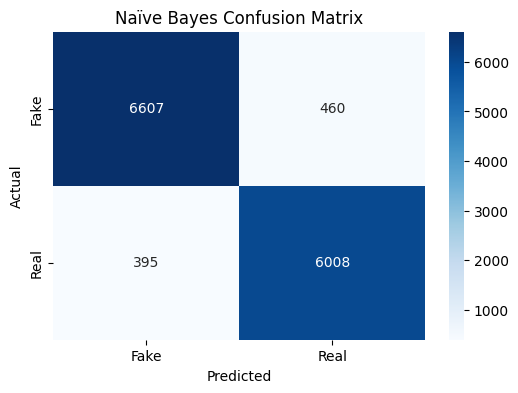

In [48]:
#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Naïve Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




---

***Random Forest Classifier***

In [51]:


# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9887156644394952
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7067
           1       0.99      0.99      0.99      6403

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470

Confusion Matrix:
 [[6984   83]
 [  69 6334]]


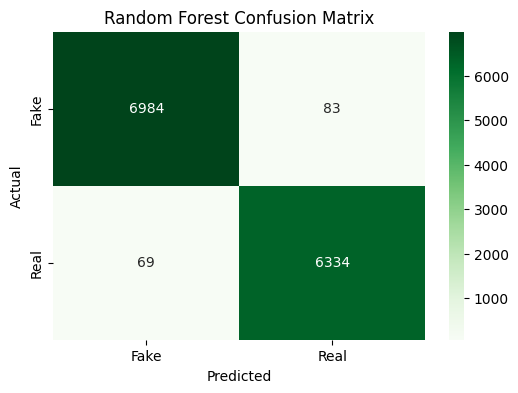

In [52]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

***LSTM (LONG-SHORT TERM MEMORY)***

---



In [53]:
#Tokenization
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq=tokenizer.texts_to_sequences(X_train)
X_test_seq=tokenizer.texts_to_sequences(X_test)

#Padding Sequences
X_train_pad=pad_sequences(X_train_seq,maxlen=200)
X_test_pad=pad_sequences(X_test_seq,maxlen=200)

#LSTM MODEL
lstm_model=Sequential()
lstm_model.add(Embedding(input_dim=5000,output_dim=128,input_length=200))
lstm_model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
lstm_model.add(Dense(1,activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_pad, y_train, epochs=3, batch_size=64, validation_split=0.2)

y_pred_lstm = (lstm_model.predict(X_test_pad) > 0.5).astype(int)
print("LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))
print("Classification Report:\n", classification_report(y_test, y_pred_lstm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lstm))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
393/393 ━━━━━━━━━━━━━━━━━━━━ 161s 400ms/step - accuracy: 0.8769 - loss: 0.2586 - val_accuracy: 0.9707 - val_loss: 0.0899
Epoch 2/3
393/393 ━━━━━━━━━━━━━━━━━━━━ 203s 404ms/step - accuracy: 0.9673 - loss: 0.0968 - val_accuracy: 0.9521 - val_loss: 0.1239
Epoch 3/3
393/393 ━━━━━━━━━━━━━━━━━━━━ 201s 403ms/step - accuracy: 0.9655 - loss: 0.0958 - val_accuracy: 0.9451 - val_loss: 0.1507
421/421 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step
LSTM Accuracy: 0.9501113585746103
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      7067
           1       0.98      0.91      0.95      6403

    accuracy                           0.95     13470
   macro avg       0.95      0.95      0.95     13470
weighted avg       0.95      0.95      0.95     13470

Confusion Matrix:
 [[6976   91]
 [ 581 5822]]


Confusion Mtrix

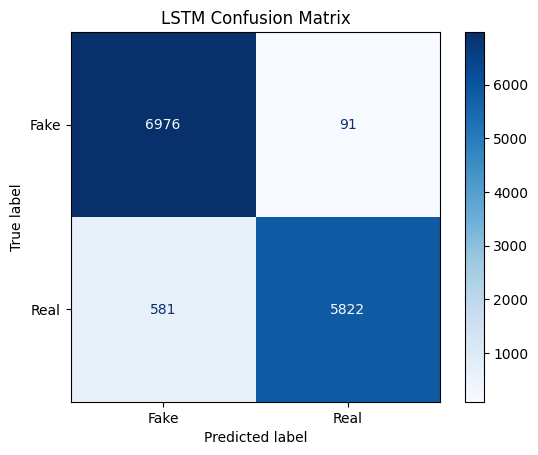

In [54]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lstm),
                                    display_labels=['Fake', 'Real'])


cm_display.plot(cmap='Blues')
plt.title('LSTM Confusion Matrix')
plt.show()

label
0    23481
1    21417
Name: text, dtype: int64


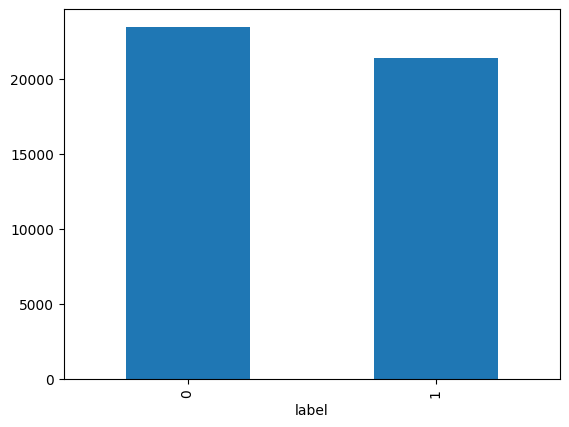

In [55]:
print(df.groupby(['label'])['text'].count())
df.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

label
0    23481
1    21417
Name: text, dtype: int64


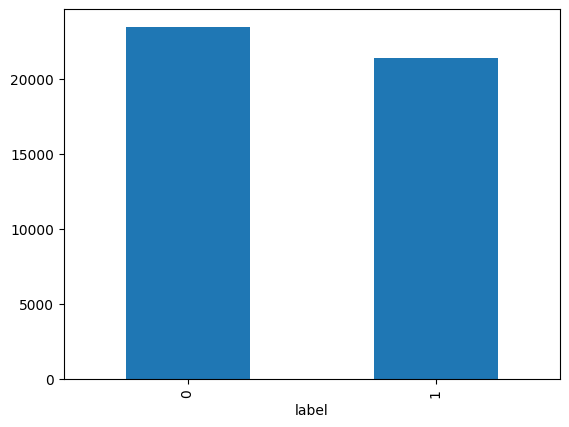

In [57]:
print(df.groupby(['label'])['text'].count())
df.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

FAKE LABEL


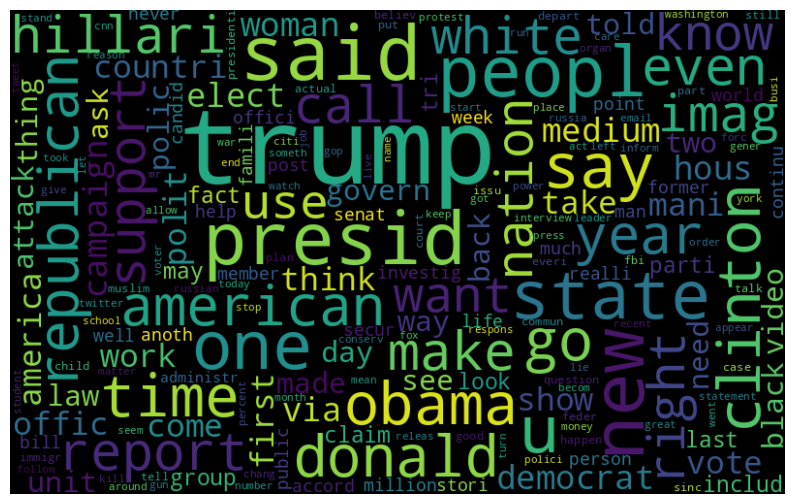

In [59]:
from wordcloud import WordCloud
print("FAKE LABEL")

fake_data = df[df["label"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

REAL LABEL


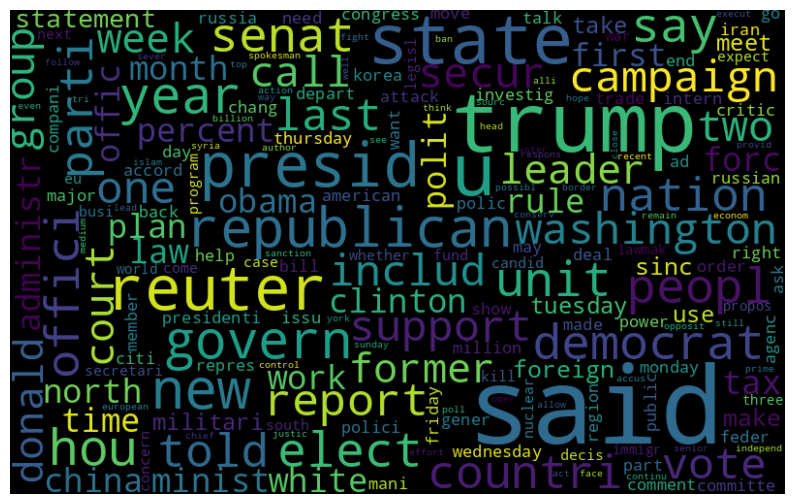

In [60]:
from wordcloud import WordCloud
print("REAL LABEL")

fake_data = df[df["label"] == 1]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

***COMPAIRING ACCURACY OF MODELS***



---





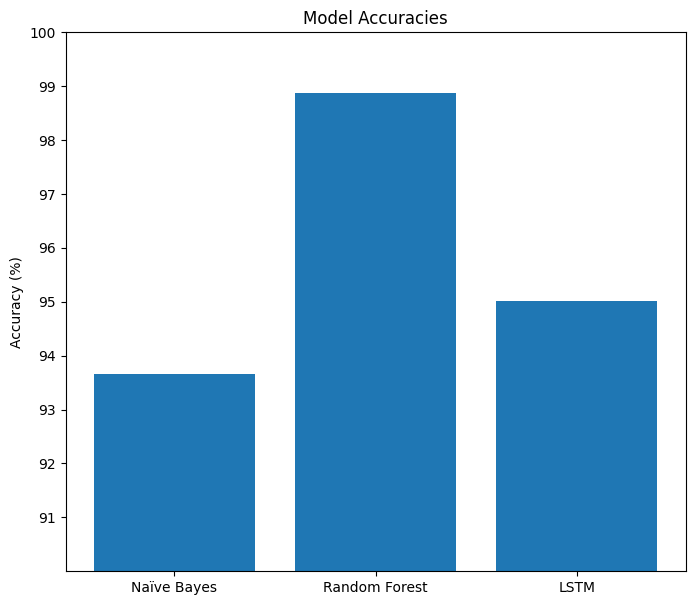

In [62]:
#COMPAIRING MODELS ACCURACY
dct = {
    "Naïve Bayes": accuracy_score(y_test, y_pred_nb) * 100,
    "Random Forest": accuracy_score(y_test, y_pred_rf) * 100,
    "LSTM": accuracy_score(y_test, y_pred_lstm) * 100
}


plt.figure(figsize=(8, 7))
plt.bar(list(dct.keys()), list(dct.values()))
plt.ylim(90, 100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.title("Model Accuracies")
plt.ylabel("Accuracy (%)")
plt.show()

***SAVE MODEL***

In [64]:
import joblib
joblib.dump(nb_model,'nb_model.pkl')
joblib.dump(rf_model,'rf_model.pkl')
joblib.dump(tfidf,'tfidf_model.pkl')




['tfidf_model.pkl']

In [76]:
lstm_model.save('lstm_model.keras')
joblib.dump(tokenizer, 'tokenizer.pkl')

['tokenizer.pkl']